# Factory Method

### Problem

We need to **standardize the architectural model for a range of applications**, but **allow for individual applications to define their own domain objects** and provide for their instantiation

And you need to give the option to the user to choose different objects, and how many *at runtime*.

This type of an application requires an `object with a specific interface to perform its tasks`. 

The `concrete implementation of the interface is identified by some parameter`.

Instead of the desired objects being hard coded into the project when it started (instead of using a complex *if/elif/else* conditional structure to determine the concrete implementation), the user now needs the option to choose.

How?

Instead of the client code directly creating objects, it delegates the responsibility to **an extra abstraction level** (between the creation of the object and where it is used in your project).

The application will delegate the decision about concrete implementation to a separate component that creates the concrete object. 
With this approach, the application code is simplified, making it more reusable and easier to maintain

### Introducing Factory Method

You can use the **Factory pattern** to add that extra abstraction. The Factory pattern is one of the easiest patterns to understand and implement.

Factory Method is a creational design pattern used to create concrete implementations of a common interface.

It separates the process of creating an object from the code that depends on the interface of the object.

The central idea in Factory Method is to provide a **separate component** `with the responsibility to decide which concrete implementation` should be used based on some specified parameter.

**Key Components of the Factory Method Pattern**

* `Concrete Creator`: The *client* application, class or method that calls the Creator (Factory method).

* `Product Interface`: The *interface* describing the attributes and methods that the Factory will require in order to create the final product/object.

* `Creator`: The *Factory class*. Declares the Factory method that will return the object requested from it.

* `Concrete Product`: The *object returned from the Factory*. The object implements the Product interface.

### Example 1

**Factory UML Diagram**

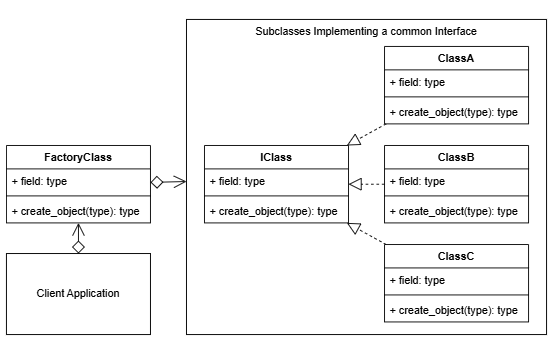

Rather than creating an object name `a` oe an obect `b` directly in the client, it `asks the creator (factory) for the object` instead.

In [ ]:
from abc import ABC, abstractmethod

#A Hypothetical Class Interface (Product)

class IClass(ABC):
    
    @staticmethod #a static method of a class that returns an object of that class' type. 
    #But unlike a constructor, the actual object it returns might be an instance of a subclass. 
    #!!! Unlike a constructor, an existing object might be reused, instead of a new object created.
    @abstractmethod
    def create_object() -> None: #An abstract interface method
       pass

In [ ]:
from typing import Self

In [ ]:
#A Concrete Class that implements the IProduct interface
class ClassA(IClass):
    def __init__(self):
        self.objType = "Concrete Class A" # field attr on the diagram above

    def create_object(self) -> Self:
        return self

In [ ]:
#A Concrete Class that implements the IProduct interface
class ClassB(IClass):
    def __init__(self):
        self.objType = "Concrete Class B"

    def create_object(self) -> Self:
        return self

In [ ]:
myObjs={'a': ClassA, 'b': ClassB}

from typing import Type

class Creator:
    '''The Factory Method Class'''

    @staticmethod
    def create_object(objType: str) ->IClass: #A static method to get a concrete product
        try:
            if objType in myObjs.keys():
                return myObjs[objType]()
            else:
                raise Exception("I can't make this object")
        except Exception as _e:
            print(_e)
        return None

In [ ]:
# The Client
objNames=['a','b','c']

for name in objNames:
    res=Creator.create_object(name)
    if res:
        print(res.objType)

Concrete Class A
Concrete Class B
I can't make this object


### Example 2

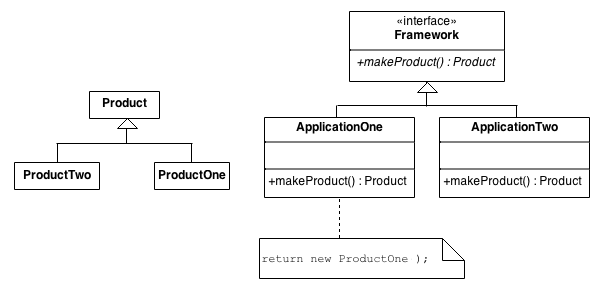

2 apps wnat to define **their own domain objects** and provide for their instantiation

The client is totally decoupled from the implementation details of derived classes.

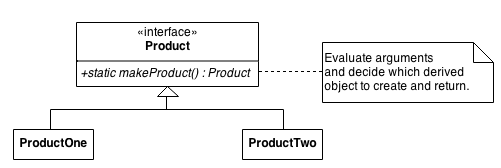

In [2]:
from abc import ABC, abstractmethod

In [3]:
class Product(ABC):
    """
    Define the interface of objects the factory method creates.
    """

    @abstractmethod
    def interface(self):
        pass
    
    # @staticmethod 
    # @abstractmethod
    # def create_object() -> None: #An abstract interface method
    #    pass

In [4]:
class ConcreteProduct1(Product):
    """
    Implement the Product interface.
    """

    def interface(self):
        return "I am Product1"


class ConcreteProduct2(Product):
    """
    Implement the Product interface.
    """

    def interface(self):
        return "I am Product2"

In [8]:
class Framework(ABC):
    """
    Declare the factory method, which returns an object of type Product.
    Creator may also define a default implementation of the factory
    method that returns a default ConcreteProduct object.
    Call the factory method to create a Product object.
    """

    def __init__(self):
        self.product = self._makeProduct()

    
    @staticmethod
    @abstractmethod
    def _makeProduct()->Product:
        pass

    def some_operation(self):
        print(self.product.interface())

In [9]:
class App1(Framework): #ConcreteCreator1
    """
    Override the factory method to return an instance of a
    ConcreteProduct1.
    """
    @staticmethod
    def _makeProduct()->ConcreteProduct1:
        return ConcreteProduct1()


class App2(Framework): #ConcreteCreator2
    """
    Override the factory method to return an instance of a
    ConcreteProduct2.
    """
    @staticmethod
    def _makeProduct()->ConcreteProduct2:
        return ConcreteProduct2()

In [10]:
def client():
    client1 = App1()
    client1.some_operation()
    


In [12]:
client()

I am Product1


### Example 3

Let's develop a game for Disney. 

The game should have d`ifferent types of enemies`, such as Z*ombie, Alien, Robot, Vampire*. 

The unique twist is that `the type of enemy` our player confronts is `determined at runtime`, influenced by an array of factors. It might be based on the player's level, a random generator, or the specific stage in the game.

Our challenge is to engineer a game with the capacity to scale the volume of enemies efficiently. Furthermore, the stakeholders have expressed their desire for the game to be flexible enough to accommodate the introduction of new enemy types each month. 

Let's create our parent *Enemy* class, which is going to be an abstract class for all the enemies. 

This is the common interface for the objects the factory method creates -> Product

Since we know that the enemies are going to attack us, we create an abstract method `attack` that is going to be implemented by concrete enemies.

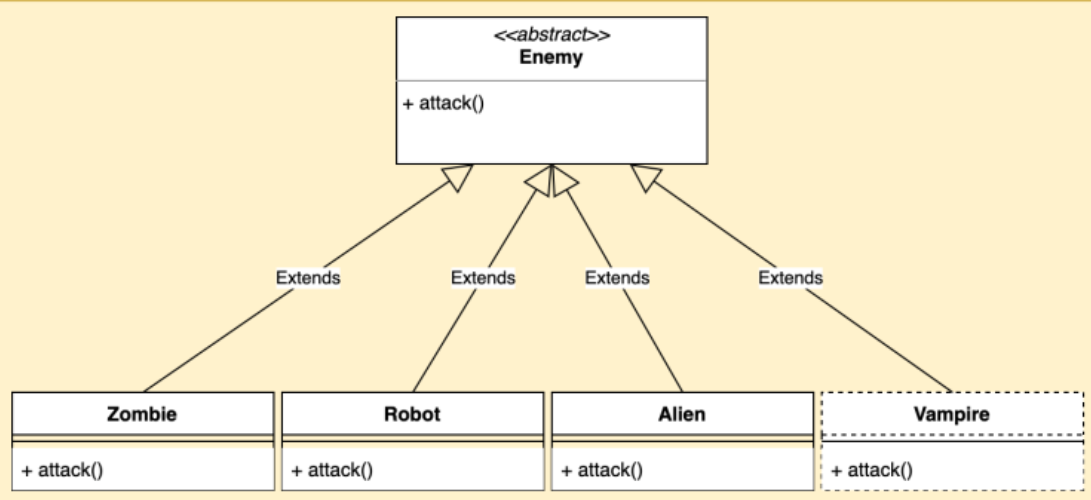

Next step, we need to delegate the creation of the enemies to a "factory" called *EnemyFactory*

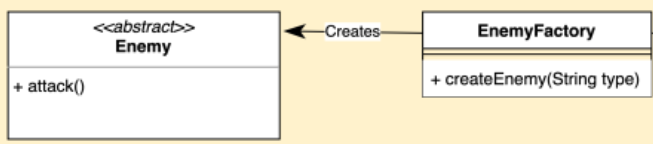

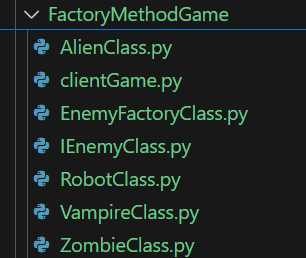

In [14]:
from FactoryMethodGame.clientGame import game

In [15]:
game()

I can't make this enemy
My Zombie is attacking now...
My Robot is attacking now...
My Vampire is attacking now...


Many of you might ask: "What's the advantage of this?" 

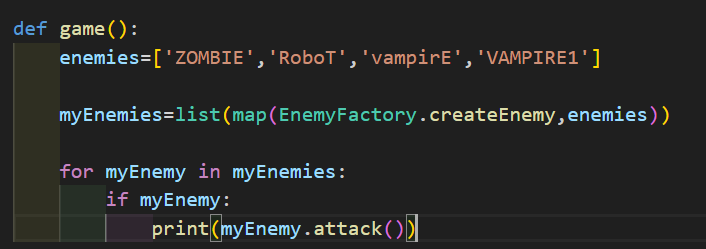

It looks like we are just pushing the problem off to another object.

So far we have seen just a tiny portion of the game, where we just create the enemies.

If the *game has different levels* or stages, `each level might have its own class`. These classes would be clients of the "EnemyFactory", using it to create the enemies of that level.

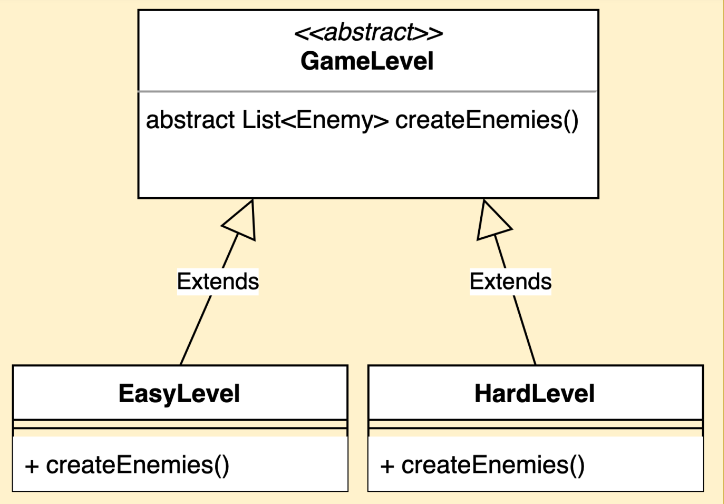

The game level is using the EnemyFactory to create Enemies

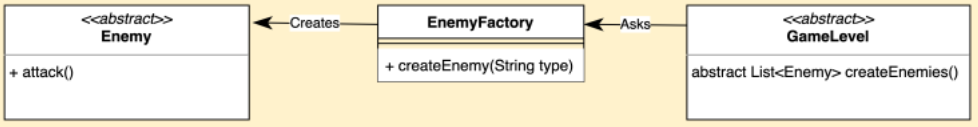

In [17]:
from FactoryMethodGame.clientGameWithLevels import gameWithLevels

gameWithLevels()

The easy level started!
My Zombie is attacking now...
My Robot is attacking now...
The hard level started!
I can't make this enemy VAMPIRE1
My Zombie is attacking now...
My Robot is attacking now...
My Vampire is attacking now...
